<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

En este notebook exploramos la clase [Circuit](https://docs.quantum.ibm.com/api/qiskit/circuit) de Qiskit.

Según el [libro de texto de Qiskit,](https://learn.qiskit.org/course/ch-algorithms/quantum-circuits)
>_"Un circuito cuántico es una rutina computacional que consta de operaciones cuánticas coherentes en qubits... Es una secuencia ordenada de compuertas cuánticas, mediciones y restablecimientos, todos los cuales pueden condicionarse y utilizar datos de la computación clásica en tiempo real."_

Por lo general cuando hablamos de circuitos cuanticos nos referimos a circuitos estaticos pero tambien pueden ser dinámicos. Qiskit introdujo los circuitos dinámicos en 2022. En este notebook veremos ambos tipos de circuitos

# Primeros Circuitos con Qiskit: Puertas y Medidas

Primero cargamos los datos de nuestra cuenta y vemos a que entornos tenemos acceso

In [2]:
from qiskit import IBMQ
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

/tmp/ipykernel_60/2784215896.py:3: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  provider = IBMQ.load_account()
/tmp/ipykernel_60/2784215896.py:3: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


In [4]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()    # List all available providers

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

## Covenciones y cuestiones a tener en cuenta

- Los Qubits siempre se inicializan en el estado |0>

- Los Qubits y los bits se numeran con enteros de 0 a n-1 como es habitual en programacion

- Qiskit numera los bits y los qubits de derecha a izquierda ($q_{n-1},..,q_0$), es la notacion Big-endian. En los libros de texto, la notacion de Dirac y otros entornos de computacion cuántica es al reves.

- Un simulador cuántico es un ordenador clásico (CPU) que calcula cual seria el resultado de operar en una QPU ideal, teórica, sin ruidos ni imperfecciones. Los simuladores funcionan bien con un numero bajo de qubits (~30 qubits) y son una herramienta indispensable en el diseño de circuitos cuánticos.

- Los angulos son positivos cuando se miden en el sentido inverso a las agujas del reloj

- El eje Z se toma como la base estandar computacional y base de medida. No es un eje especial, simplemente una convención.

## Circuitos cuánticos

Comenzamos explorando algunas funcionalidades de Quiskit Terra. Crearemos nuestro primer Circuito Cuántico.


### EJERCICIO

Utiliza el IBM Quantum Composer para crear un circuito cuantico que cree el estado de Bell $\frac{1}{\sqrt(2)}(|00>+|11>)$

Primero creamos dos objetos **QuantumRegister** y **ClassicalRegister** del número de qubits que necesitemos. Después creamos un objeto QuantumCircuit con los dos registros anteriores, añadimos las puertas de medida y podemos ejecutarlo en el simulador.

Copiamos el codigo y vamos a ejecutarlo en Qiskit:

In [1]:
from qiskit import QuantumRegister, ClassicalRegister

qreg= QuantumRegister(2)        #create a quantum register with 2 qubits
creg= ClassicalRegister(2)      #create a classical register with 2 classical bits

In [2]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(qreg,creg)  #creates a QuantumCircuit object that operates on a QuantumRegister ans a ClassicalRegister
circuit.h(0)                         #applies Hadamard gate to qubit 0
circuit.cx(0, 1)                     #applies a cnot gate with control qubit 0 and target qubit 1
circuit.measure(qreg,creg)           #measure all qubits in qreg and put results in creg

Revisa la documentacion de la clase [Cirquit](https://docs.quantum.ibm.com/api/qiskit/circuit) de qiskit, dibuja el circuito:

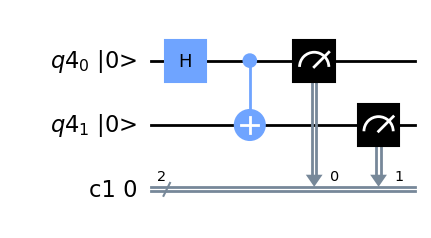

In [15]:
circuit.draw(initial_state=True)

Ahora ejecutamos el circuito en el simulador Aer y visualizamos los resultados en un histograma.


In [16]:
from qiskit import Aer 

sim = Aer.get_backend('aer_simulator', shots=1024)  # this is the simulator we'll use
result = sim.run(circuit, memory=True).result()  # we run the experiment and get the result from that experiment  -> memory=True to get results for each shot
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
print(counts)

{'00': 531, '11': 493}


Muestra los primeros 5 resultados de las medidas

In [17]:
#Vemos los 5 primeros resultados de la simulacion
data = result.get_memory()
data[:5]

['11', '11', '11', '11', '11']

Utiliza la funcion `plot_histogram` para mostrar los resultados obtenidos en todas las medidas

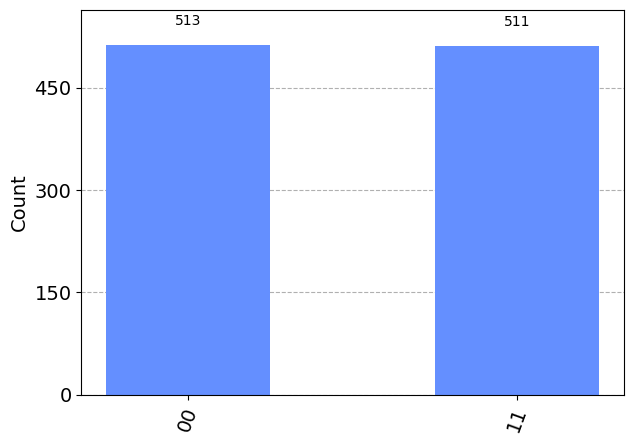

In [41]:
from qiskit.visualization import plot_histogram

# visualizamos el histograma
plot_histogram(counts)

## Puertas de un qubit

Rotaciones básicas en un Qubit y medidas en la esfera de Bloch.

De forma predeterminada, los estados en Qiskit comienzan en $|0\rangle$, que corresponde a la "flecha hacia arriba" en la esfera de Bloch. 

Los siguientes métodos definen las puertas $X$, $Y$, $Z$, $H$, $S$ y $S^\dagger$ que proporcionan las diferentes rotaciones en la esfera de Bloch en el qubit de un objeto circuito. Para ello inserte combinaciones de las siguientes líneas de código en las líneas indicadas en el programa:

```
    qc.x(0) # rotación de Pi alrededor del eje x
    qc.y(0) # rotación por Pi alrededor del eje y
    qc.z(0) # rotación por Pi alrededor del eje z
    qc.s(0) # rotación por Pi/2 alrededor del eje z
    qc.sdg(0) # rotación por -Pi/2 alrededor del eje z
    qc.h(0) # rotación de Pi alrededor de un eje ubicado a medio camino entre x y z
    qc.rx(Φ,0) # rotación por Φ alrededor del eje x
    qc.ry(Φ,0) # rotación por Φ alrededor del eje y
    qc.rz(Φ,0) # rotación por Φ alrededor del eje z
    qc.u(Φ,θ,λ,0) # rotación por Φ alrededor del eje x, θ alrededor del eje y λ alrededor del eje z
```

### EJERCICIO

Manipulando un qubit, podemos visualizar los resultados de las operaciones sobre la [esfera de Bloch](https://javafxpert.github.io/grok-bloch/)

Intenta alcanzar el estado dado en la esfera de Bloch en cada uno de los siguientes ejercicios aplicando las rotaciones correctas

*  |1⟩
*  |+⟩= $\frac{1}{\sqrt(2)}(|0>+|1>)$
*  |−⟩= $\frac{1}{\sqrt(2)}(|0>-|1>)$
*  |−i⟩=$\frac{1}{\sqrt(2)}(|0>-i|1>)$

<IPython.core.display.Latex object>

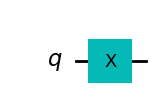

<IPython.core.display.Latex object>

In [42]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit

ket0 = Statevector([1,0])
display(ket0.draw('latex'))


circuit = QuantumCircuit(1)

circuit.x(0)

display(circuit.draw())

ket_out=ket0.evolve(circuit)
display(ket_out.draw('latex'))

<IPython.core.display.Latex object>

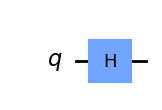

<IPython.core.display.Latex object>

In [43]:
ket0 = Statevector([1,0])
display(ket0.draw('latex'))


circuit = QuantumCircuit(1)

circuit.h(0)

display(circuit.draw())

ket_out=ket0.evolve(circuit)
display(ket_out.draw('latex'))

<IPython.core.display.Latex object>

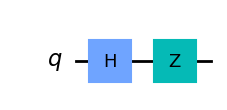

<IPython.core.display.Latex object>

In [44]:
ket0 = Statevector([1,0])
display(ket0.draw('latex'))


circuit = QuantumCircuit(1)

circuit.h(0)
circuit.z(0)

display(circuit.draw())

ket_out=ket0.evolve(circuit)
display(ket_out.draw('latex'))

<IPython.core.display.Latex object>

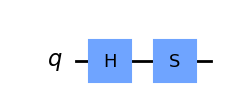

<IPython.core.display.Latex object>

In [45]:
ket0 = Statevector([1,0])
display(ket0.draw('latex'))


circuit = QuantumCircuit(1)

circuit.h(0)
circuit.s(0)

display(circuit.draw())

ket_out=ket0.evolve(circuit)
display(ket_out.draw('latex'))

### EJERCICIO

Crea un circuito de un solo qubit con una puerta unitaria de rotacion Φ= $\pi/2$, θ= $\pi/2$, λ= $\pi/2$ y dibujalo.

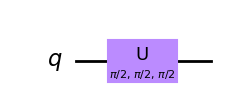

In [46]:
from numpy import pi
circuit = QuantumCircuit(1)
circuit.u(pi/2,pi/2,pi/2,0)
circuit.draw()

## Puertas Multi-Qubit

Como ordena Qiskit los qubits en los vectores de estados cuánticos?

En la comunidad Física los registros de multiples Qubits se ordenan típicamente de izquierda a derecha, como $q_0, q_{n-1}$. Qiskit utiliza un orden diferente, en el que el qubit más significativo (MSB) está a la izquierda y le menos significativo (LSB) a la derecha $q_{n-1},..,q_0$, es la __notacion Big-endian__. Esto es similar a la representacion de las cadenas binarias en computacion clásica, lo que facilita la conversion entre cadenas binarias a enteros y resultados de medidas.

Esto tiene importantes efectos en la representacion vectorial de los estados y las matrices de las puertas que los transforman [operaciones de multiples qubits](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#Two-qubit-gates)

La enumeracion de los vectores de la base, en Qiskit sigue tambien el orden de los numeros enteros que estos representan. Por ejemplo, en un sistema de 2 qubits: los vectores de la base se ordenan como |00⟩, |01⟩, |10⟩, and |11⟩. Si pensamos en los vectores de la base como cadenas binarias y codificamos estas como enteros tenemos que los estados de la base son 0, 1, 2 y 3 respectivamente.

Las puertas básicas en dos y tres qubits están dadas por [control gates](https://qiskit.org/textbook/ch-gates/introduction.html) y se aplican a un objeto `QuantumCircuit` con los siguientes  metodos:

    qc.cx(c,t) # puerta controlada-X (= CNOT) con qubit de control c y qubit objetivo t
    qc.cz(c,t) # puerta Z controlada con qubit de control c y qubit t de destino
    qc.ccx(c1,c2,t) # puerta controlada-controlada-X (= Toffoli) con qubits de control c1 y c2 y qubit objetivo t
    qc.swap(a,b) # Puerta SWAP que intercambia los estados del qubit a y del qubit b

Comenzamos con una puerta fácil en dos qubits, la puerta NO controlada (también CNOT). La puerta CNOT no tiene ningún efecto cuando se aplica sobre dos qubits en estado $|0\rangle$, pero esto cambia si aplicamos una puerta Hadamard antes al qubit de control para ponerlo en superposición. De esta manera, podemos crear estados entrelazados. 

### EJERCICIO

Construye el estado de Bell $|\Psi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$.

Agrega una medición al circuito para que podamos ejecutarlo (usando el simulador) y representa el histograma de los recuentos correspondientes.

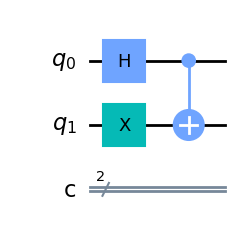

In [47]:
qc = QuantumCircuit(2,2)

qc.x(1)   #we need to initialize the target qbit to |1>
qc.h(0)
qc.cx(0,1)

qc.draw() # we draw the circuit

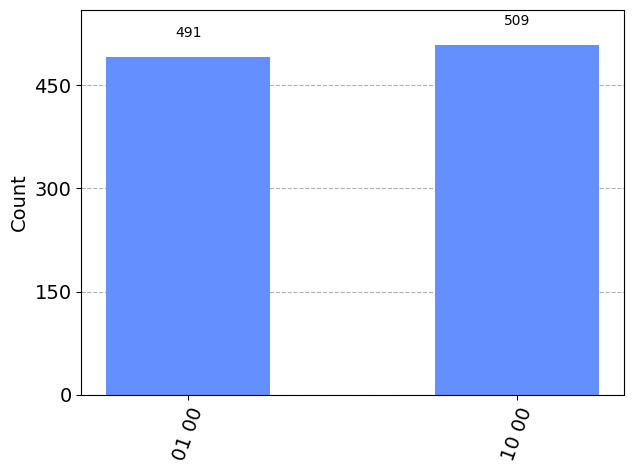

In [48]:
from qiskit import execute

qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

### EJERCICIO

Escribe un circuito cuántico de 3 qubits que cree el estado similar a GHZ, $|\Psi\rangle = \frac{1}{\sqrt{2}} \left(|011\rangle - |100 \rangle \right)$.

Agrega una medición al circuito para que podamos ejecutarlo (usando el simulador) y representa el histograma de los recuentos correspondientes.

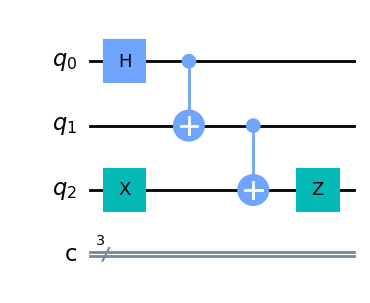

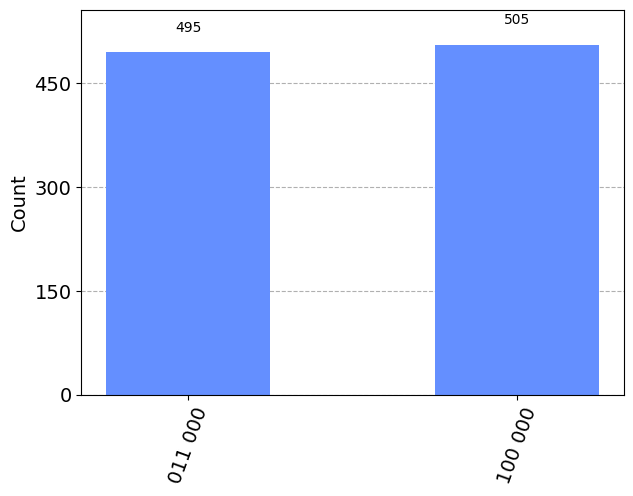

In [49]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.x(2)
qc.cx(0,1)
qc.cx(1,2)
qc.z(2)

display(qc.draw())

qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

### EJERCICIO

Creamos un circuito que tenga 2 qubits:
 - $q[0]$ inicializado con 0 y $q[1]$ en estado |1>
 - aplicamos la puerta h a ambos qubits
 - aplicamos la puerta control z a ambos qubits

 Ejecutar el circuito en el simulador, visualizar e interpretar los resultados

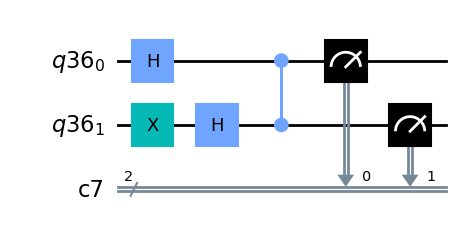

{'10': 262, '00': 255, '01': 256, '11': 251}


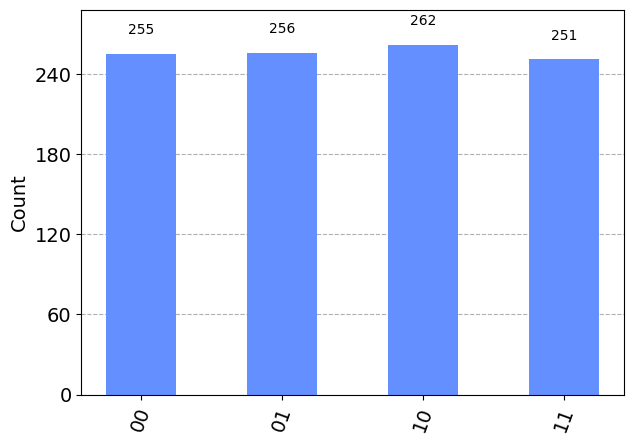

In [50]:
#Crea un circuito de 2 qubits que aplique la puerta h al qubit 0 y las puertas hth al qubit 1
qreg= QuantumRegister(2)        #create a quantum register with 2 qubits
creg= ClassicalRegister(2)      #create a classical register with 2 classical bits

circuit = QuantumCircuit(qreg,creg)
circuit.x(1)
circuit.h(0)                         #applies Hadamard gate to qubit 0
circuit.h(1)
circuit.cz(0,1)
circuit.measure(qreg,creg)

#Dibuja el circuito
display(circuit.draw())

#Ejecutalo en el simulador
sim = Aer.get_backend('aer_simulator', shots=1024)  # this is the simulator we'll use
result = sim.run(circuit, memory=True).result()  # we run the experiment and get the result from that experiment  -> memory=True to get results for each shot
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
print(counts)

#visualiza el histograma de resultados -> no vemos las fases en los resultados y no se ve el efecto de phase kickback
plot_histogram(counts)

### EJERCICIO

Crea un circuito de 2 qubits que aplique la puerta H al qubit 0 y las puertas HTH al qubit 1.

Dibuja el circuito

Ejecutalo en el simulador, visualiza el histograma de resultados.

Comprueba el resultado de las operaciones HTH en el qubit 1 visualizadas en la esfera de bloch [Simulador de Bloch](https://javafxpert.github.io/grok-bloch/) y explica los resultados obtenidos en el histograma de medidas del circuito.

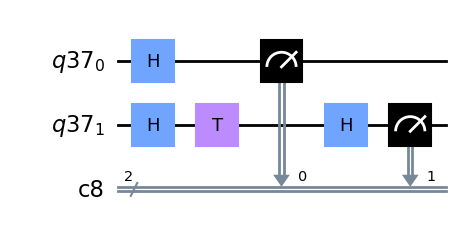

{'10': 83, '00': 425, '11': 73, '01': 443}


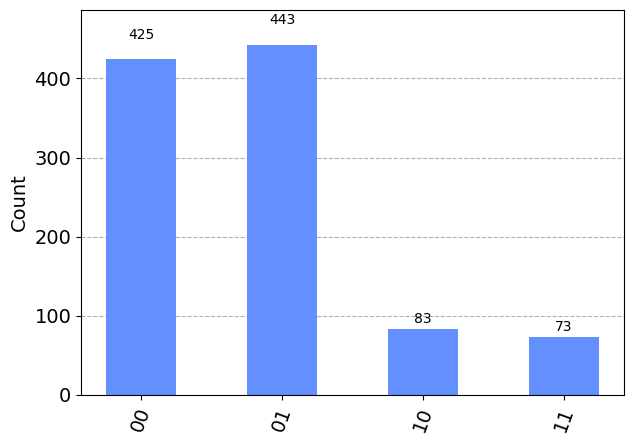

In [51]:
#Crea un circuito de 2 qubits que aplique la puerta h al qubit 0 y las puertas hth al qubit 1
qreg= QuantumRegister(2)        #create a quantum register with 2 qubits
creg= ClassicalRegister(2)      #create a classical register with 2 classical bits

circuit = QuantumCircuit(qreg,creg)  #creates a QuantumCircuit object that operates on a QuantumRegister ans a ClassicalRegister
circuit.h(0)                         #applies Hadamard gate to qubit 0
circuit.h(1)
circuit.t(1)
circuit.h(1)
circuit.measure(qreg,creg)

#Dibuja el circuito
display(circuit.draw())

#Ejecutalo en el simulador
sim = Aer.get_backend('aer_simulator', shots=1024)  # this is the simulator we'll use
result = sim.run(circuit, memory=True).result()  # we run the experiment and get the result from that experiment  -> memory=True to get results for each shot
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
print(counts)

#visualiza el histograma de resultados
plot_histogram(counts)

## Propiedades de los circuitos cuánticos

Cuando construimos circuitos cuánticos, hay varias propiedades que nos ayudan a cuantificar el tamaño de estos. El tamaño de un circuito afecta directamente al ruido total que experimentará este cuando corra en un dispositivo cuántico real. Algunas de estas propiedades son el número de qubits, la profundidad y el número de componentes tensoriales, etc...

Veamos algunas de esas propiedades y, en preparacion para entender como un circuito cambia cuando se ejecuta en un ordenador cuántico real, resaltaremos como afecta este cambio.

### EJERCICIO

Tomamos el siguiente circuito de la documentacion de Qiskit: [circuito ejemplo](https://docs.quantum.ibm.com/api/qiskit/circuit#quantum-circuit-properties)

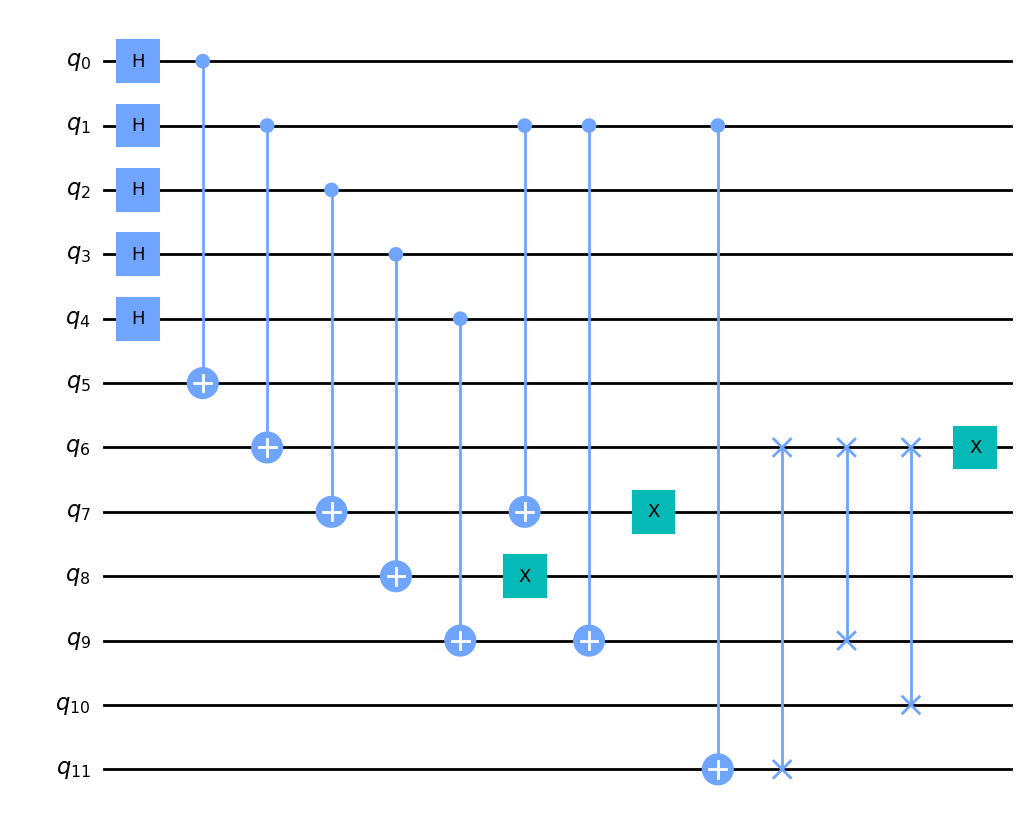

In [52]:
qc = QuantumCircuit(12)
for idx in range(5):
    qc.h(idx)
    qc.cx(idx, idx+5)

qc.cx(1, 7)
qc.x(8)
qc.cx(1, 9)
qc.x(7)
qc.cx(1, 11)
qc.swap(6, 11)
qc.swap(6, 9)
qc.swap(6, 10)
qc.x(6)
qc.draw()

Podemos observar que tiene 12 qubits, y una coleccion de puertas Hadamard, CNOT, X y SWAP. Pero en términos de programacion o eficiencia de ejecucion, ¿cómo podemos caracterizarlo?

El número de qubits del circuito es igual a la anchura __width__ del circuito:


In [53]:
qc.width()

12

El numero de qubits podemos obtenerlo tambien de la propiedad __num_qubits__ de la clase QuantumCircuit:

In [54]:
qc.num_qubits

12

**IMPORTANTE**

Para circuitos que se componen solo de qubits, la 'anchura' del circuito es igual al número de qubits. Esta equivalencia no es cierta para otros circuitos que ademas incluyen registros clásicos, puertas controladas por registros clásicos etc.

Otra propiedad del circuito es el número y tipo de puertas que utiliza, que puede obtenerse con __count_ops__:

In [55]:
qc.count_ops()

OrderedDict([('cx', 8), ('h', 5), ('x', 3), ('swap', 3)])

Para contar el número de operaciones en bruto de un circuito utilizamos __size__:

In [56]:
qc.size()

19

Otra propiedad particularmente importante es la profundidad del circuito, __depth__. La profundidad mide el numero de capas de puertas cuánticas que pueden ser ejecutadas en paralelo.

Como las puertas requieren un tiempo de implementación esta medida nos da una idea del tiempo que el circuito tardará en su ejecución cuando corra sobre un dispositivo cuántico real.

In [57]:
qc.depth()

9

Otra medida que se ve a menudo es contar el número de puertas de múltiples qubits en lugar de todas las puertas, ya que normalmente son "más caras" que otras puertas. En nuestro caso, "más caras" significa que a menudo tienen una tasa de error mucho mayor (alrededor de 10 veces mayor) en comparación con las puertas de un solo qubit.

El numero de puertas multiqubits se mide con el metodo __num_nonlocal_gates__


In [58]:
qc.num_nonlocal_gates()

11

### EJERCICIO

Creamos un circuito que tenga 4 qubits:
 - Todos qubits inicializados a 0
 - aplicamos a $q[0]$ la puerta h y tres puertas S
 - aplicamos una puerta CNOT entre el qubit 0 y 1
 - aplicamos una puerta CNOT entre el qubit 1 y 3

Calcula el numero de qubits (width), el numero de puertas (count_ops), tamaño (size y su profundidad (depth)


Creamos otro circuito que tenga 4 qubits:
 - Todos qubits inicializados a 0
 - aplicamos a $q[0]$ la puerta h
 - aplicamos puertas S al resto de los qubits
 - aplicamos una puerta CNOT entre el qubit 0 y 1
 - aplicamos una puerta CNOT entre el qubit 2 y 3

Calcula el numero de qubits (width), el numero de puertas (count_ops), tamaño (size y su profundidad (depth)

Compara las propiedades de los dos circuitos

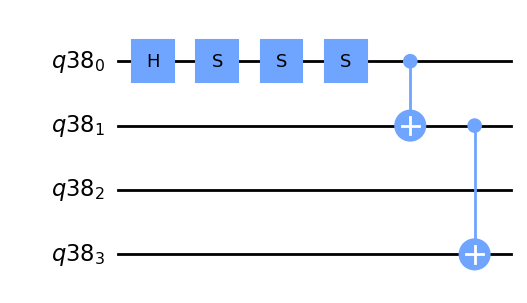

width 4
count_ops OrderedDict([('s', 3), ('cx', 2), ('h', 1)])
size 6
depth 6


In [59]:
#Crea un circuito 1 de 4 qubits
qreg= QuantumRegister(4)        #create a quantum register with 2 qubits

circuit = QuantumCircuit(qreg)
circuit.h(0)
circuit.s(0)
circuit.s(0)
circuit.s(0)
circuit.cx(0,1)
circuit.cx(1,3)

#Dibuja el circuito
display(circuit.draw())

#imprime las características del circuito
print('width', circuit.width())
print('count_ops', circuit.count_ops())
print('size', circuit.size())
print('depth', circuit.depth())

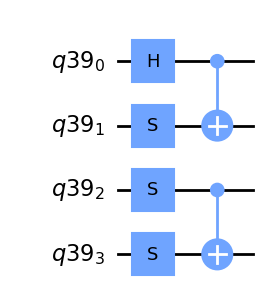

width 4
count_ops OrderedDict([('s', 3), ('cx', 2), ('h', 1)])
size 6
depth 2


In [60]:
#Crea un circuito 2 de 4 qubits
qreg= QuantumRegister(4)        #create a quantum register with 2 qubits

circuit = QuantumCircuit(qreg)
circuit.h(0)
circuit.s(1)
circuit.s(2)
circuit.s(3)
circuit.cx(0,1)
circuit.cx(2,3)

#Dibuja el circuito
display(circuit.draw())

#imprime las características del circuito
print('width', circuit.width())
print('count_ops', circuit.count_ops())
print('size', circuit.size())
print('depth', circuit.depth())

### EJERCICIO

Dado el siguiente circuito que construye un estado totalmente entrelazado, calcula el numero de qubits (width), el numero de puertas (count_ops), tamaño (size y su profundidad (depth).

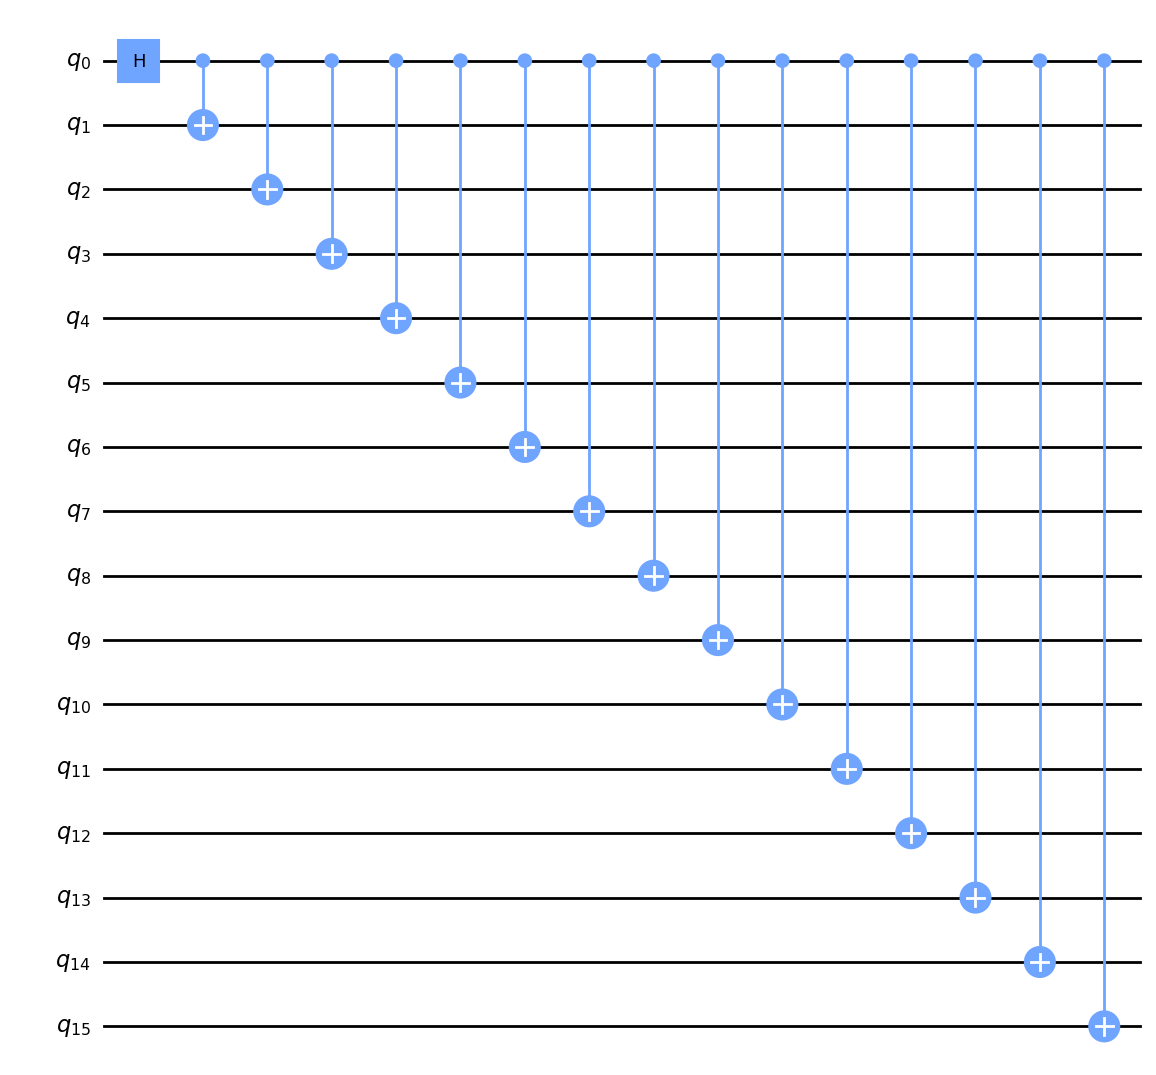

16


In [61]:
qc = QuantumCircuit(16)

#Step 1: Preparing the first qubit in superposition
qc.h(0)

#Step 2: Entangling all other qubits with it (1 is included 16 is exclude)
for x in range(1, 16):
  qc.cx(0,x)

display(qc.draw('mpl'))
print(qc.depth())

Como podemos ver, el circuito cuántico anterior tiene una profundidad igual a su número de puertas. El paso 1 agrega una profundidad de 1 y el paso 2 agrega una profundidad de 15.

Intentemos reducir su profundidad. Está bastante claro que no podemos hacer mejor el paso 1, pero el paso 2 se puede hacer mucho mejor. Intentemos encontrar una solución que solo use una profundidad de 4, en lugar de 15

Sugerencia: pensemos en qué tipo de tiempo de ejecución asintótico causaría solo 4 operaciones. Y no olvides que la profundidad final será 5 (Pasos 1 y 2 combinados).

In [62]:
qb_to_be_target= list(range(0,16)) #[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
qb_targeted=[qb_to_be_target.pop(0)] # qb_targeted [0]  qb_to_be_targeted [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
while len(qb_to_be_target)>0:
    print('--------------------------------------')
    print('targeted_list', qb_targeted)
    print('to_be_targeted_list', qb_to_be_target)
    targets=[]
    for q in qb_targeted:
        target=qb_to_be_target.pop(0)
        targets.append(target)
        print(q,',',target)
    qb_targeted+=targets

--------------------------------------
targeted_list [0]
to_be_targeted_list [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
0 , 1
--------------------------------------
targeted_list [0, 1]
to_be_targeted_list [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
0 , 2
1 , 3
--------------------------------------
targeted_list [0, 1, 2, 3]
to_be_targeted_list [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
0 , 4
1 , 5
2 , 6
3 , 7
--------------------------------------
targeted_list [0, 1, 2, 3, 4, 5, 6, 7]
to_be_targeted_list [8, 9, 10, 11, 12, 13, 14, 15]
0 , 8
1 , 9
2 , 10
3 , 11
4 , 12
5 , 13
6 , 14
7 , 15


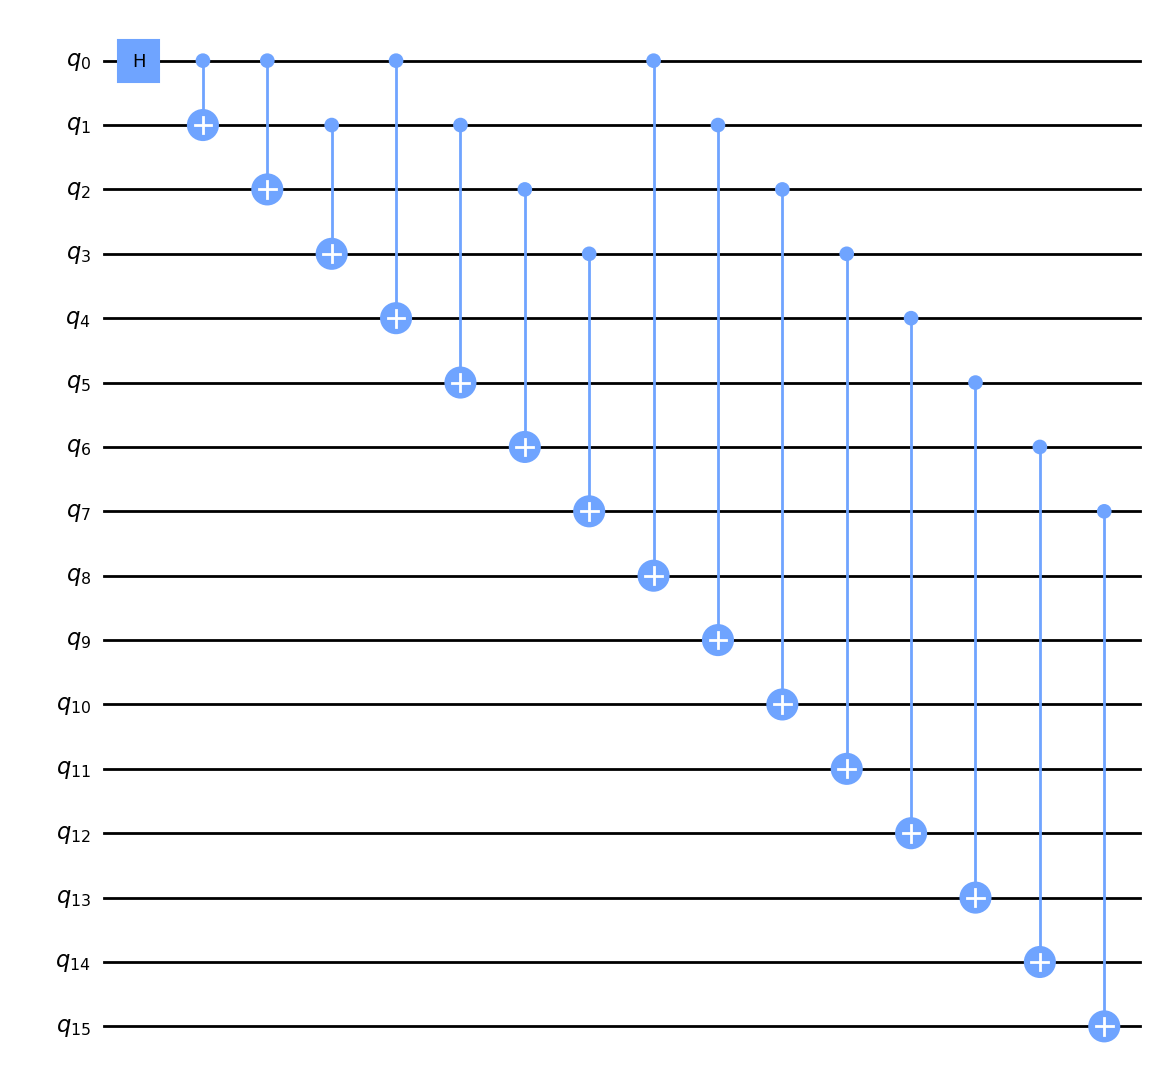

5


In [63]:
qc = QuantumCircuit(16) #Same as above

#Step 1: Preparing the first qubit in superposition
qc.h(0)

#
#
# FILL YOUR CODE IN HERE
#
qb_to_be_target= list(range(0,16)) #[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
qb_targeted=[qb_to_be_target.pop(0)] # qb_targeted [0]  qb_to_be_targeted [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
while len(qb_to_be_target)>0:
    targets=[]
    for q in qb_targeted:
        target=qb_to_be_target.pop(0)
        targets.append(target)
        qc.cx(q,target)
    qb_targeted+=targets
    
display(qc.draw('mpl'))
print(qc.depth())

## Circuitos dinámicos

Por lo general, cuando hablamos de circuitos cuánticos, nos referimos a circuitos cuánticos _estáticos_, incluso si no lo decimos explícitamente. Entonces, ¿qué son los circuitos dinámicos?

Los **circuitos dinámicos** son circuitos cuánticos que contienen mediciones en medio del circuito donde los resultados de esas mediciones se usan para condicionar compuertas cuánticas más adelante en el circuito. La capacidad de condicionar futuras operaciones cuánticas en los resultados de las mediciones clásicas se conoce como `feedforward clásico`.

¿Por qué necesitamos feedforward clásico? Un ejemplo puede ayudar: Considera la operación de restablecimiento condicional, que puede sonarte familiar si alguna vez usaste la operación [`reset`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.reset.html) en Qiskit. Si bien la operación de restablecimiento es una operación no unitaria que restablece el qubit al estado cero sin importar el estado inicial, la operación de restablecimiento condicional se realiza en un qubit ya medido para restablecerlo a cero mediante la aplicación de una compuerta bit-flip X solo si el qubit está en el estado uno, según lo determinado a partir de su valor medido. El restablecimiento condicional puede ser una forma más rápida y menos propensa a errores de restablecer un qubit si ya se ha medido.

Dicho de otra manera, los circuitos dinámicos son circuitos cuánticos que incluyen flujo de control, como declaraciones if y bucles while, donde los predicados se calculan a partir de los resultados de mediciones de qubit anteriores y las operaciones condicionales incluyen compuertas cuánticas.

### EJERCICIO

Revisa la documentacion de la clase Circuit de Qiskit para ver la operacion del método [`if_test()`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.if_test.html)

Construye un circuito que demuestre la operación de restablecimiento condicional siguiendo los siguientes pasos:

1. Inicializa un circuito con 1 qubit y 2 bits clásicos. ($q_{0}$, $b_{0}$ y $b_{1}$)
2. Aplica una compuerta Hadamard a $q_{0}$.
3. Mide ese qubit y guarda el resultado en $b_{0}$.
4. Comienza un bloque `if_test` condicionado a que $b_{0}$ sea igual a 1.
5. En el bloque `if_test`, especifica la operación a realizar si se cumple la condición, en este caso, cambiando $q_{0}$ el estado de $q_{0}$ con una puerta X.
6. Vuelve a medir $q_0$ en $b_{1}$ para comprobar que siempre obtenemos 0.

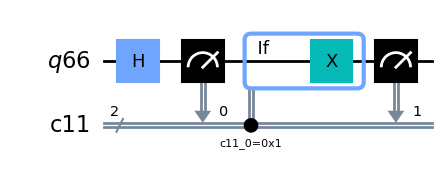

In [82]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(1)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# unpack the qubit and classical bits from the registers
(q0,) = qr
b0, b1 = cr

# apply Hadamard
qc.h(q0)
# measure
qc.measure(q0, b0)

# begin if test block. the contents of the block are executed if b0 == 1
with qc.if_test((b0, 1)):
    # if the condition is satisfied (b0 == 1), then flip the bit back to 0
    qc.x(q0)
# finally, measure q0 again
qc.measure(q0, b1)

qc.draw(output="mpl", idle_wires=False)

Ejecutalo varias veces para ver si siempre obtenemos el resultado esperado. La primera medición puede ser 0 o 1, pero la segunda medición siempre debe ser 0.

Counts: {'00': 492, '01': 532}


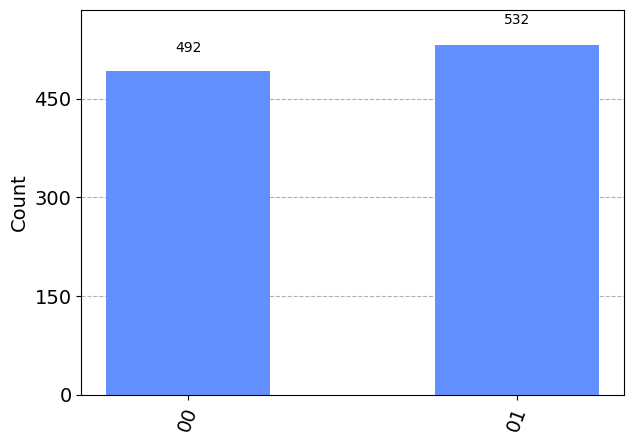

In [83]:
from qiskit_aer import AerSimulator
from qiskit.visualization import *

# initialize the simulator
backend_sim = AerSimulator()

# run the circuit
reset_sim_job = backend_sim.run(qc)
# get the results
reset_sim_result = reset_sim_job.result()
# retrieve the bitstring counts
reset_sim_counts = reset_sim_result.get_counts()

print(f"Counts: {reset_sim_counts}")

# plot histogram
plot_histogram(reset_sim_counts)

### EJERCICIO

Diseña un circuito de dos qubits. 

Para que el valor de $q_{0}$ sea aleatorio, lo primero que haremos será aplicar una Hadamard en ese qubit. A continuación, mediremos $q_{0}$ en $b_{0}$. 

Después de eso, el objetivo es actuar de manera diferente sobre $q_{1}$ dependiendo del valor de $q_{0}$. Si la medición en $q_{0}$ es 0, aplica una puerta $X$ en $q_{1}$. Si se lee 1, aplica una Hadamard en $q_{1}$ 

Finalmente, se mide $q_{1}$.

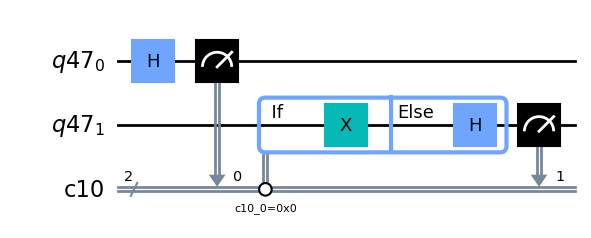

In [66]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

q0, q1 = qr
b0, b1 = cr

qc.h(q0)
qc.measure(q0, b0)

####### your code goes here #######
with qc.if_test((b0, 0)) as else_:
    qc.x(q1)
with else_:
    qc.h(q1)


qc.measure(q1, b1)
qc.draw(output="mpl", idle_wires=False)

Ejecuta el circuito y muestra el histograma de resultados obtenidos

In [67]:
backend_sim = AerSimulator()

job_1 = backend_sim.run(qc)
result_1 = job_1.result()
counts_1 = result_1.get_counts()

print(f"Counts: {counts_1}")

Counts: {'11': 263, '01': 265, '10': 496}


## Otras operaciones de interés en los Circuitos Cuánticos

A continuación se recogen algunas de las funciones más interesantes para trabajar con circuitos cuánticos, que es importante conocer.

### Inicializar un circuito con un estado determinado

#### EJERCICIO

Prueba el metodo [initialize](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#initialize) e inicializa un circuito de 4 qubits con los estados '01+-'

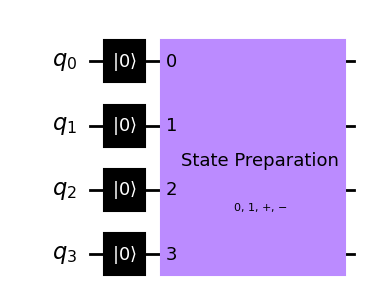

In [73]:
# Initializacion (Usando la instruccion initialize)

qc = QuantumCircuit(4)

qc.initialize('01+-')
qc.draw()
qc.decompose().draw()

#### EJERCICIO

Inicializa un circuito de 2 qubits con el estado $\frac{1}{\sqrt(2)}(|0>+|1>)$ en el qubit 0

<IPython.core.display.Latex object>

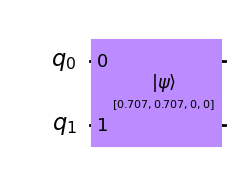

In [74]:
# Initializacion
from qiskit.visualization import array_to_latex
import math

desired_vector = [1 / math.sqrt(2), 1 / math.sqrt(2), 0, 0]
display(array_to_latex(desired_vector))


qc = QuantumCircuit(2)
qc.initialize(desired_vector, [0, 1])
qc.draw()

### Componer y Descomponer circuitos

Podemos componer circuitos con los métodos __append__ y __compose__

#### EJERCICIO

Inpecciona los metodos:

- [`.append()`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#append) 
- [`.compose()`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#compose)
- [`.decompose()`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#decompose)

de la clase `QuantumCircuit` y dados los siguientes circuitos `sub_q` y `circ` realiza las siguientes operaciones:

- una composicion para añadir `sub_circ` a `circ` en los qubits 1 y 2 (con `append()` y con `compose()`). Dibuja los circuitos resultados, ¿que diferencias tiene cada metodo?
- realiza una operacion de `decompose()` del circuito final y dibuja el circuito resultado que se obtiene


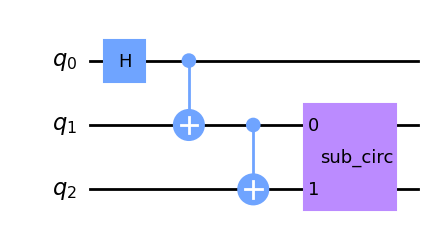

In [7]:
#Creamos un circuito de 2 qubits
from qiskit import QuantumRegister
# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[0])
sub_circ.crz(1, sub_q[0], sub_q[1])
sub_circ.barrier()
sub_circ.id(sub_q[1])
sub_circ.u(1, 2, -2, sub_q[0])
display(sub_circ)

# lo vamos a añadir a otro de circuito de 3 qubits para que aplique a los qr[1], qr[2]
qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
display(circ)


In [ ]:

##con append() necesitamos convertir los circuitos a instrucciones
# Convertimos el circuito a una puerta
sub_inst = sub_circ.to_instruction()
circ.append(sub_inst, [qr[1], qr[2]])   #-> append devuelve un objeto de tipo instructionSet object  #.compose() devuelve un objeto QuantumCircuit

circ.draw()

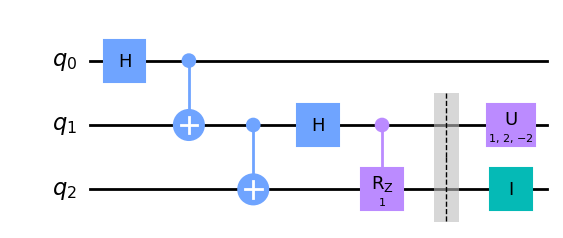

In [8]:
## con compose()
qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])

circ.compose(sub_circ, qubits=[1, 2], inplace=True)

circ.draw()

Podemos usar la operacion __decompose__ para descomponer circuitos compuestos y ver todas las puertas del circuito total.

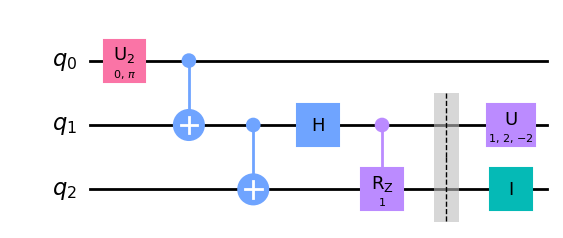

In [76]:
decomposed_circ = circ.decompose() # No modifica el circuito original
decomposed_circ.draw()

Podemos obtener la matriz unitaria de un circuito. Para ello lo ejecutamos en el simulador y en lugar de añadir medidas añadimos __save_unitary__

### Circuitos a partir de operadores

Los circuitos son matrices unitarias que transforman los estados cuanticos que son vectores.

Podemos construir un circuito a partir de una matriz unitaria

#### EJERCICIO

Revisa la documentacion del metodo [unitary](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#unitary) y construye un circuito a partir de la siguiente matrix unitaria

Dibuja el circuito, si no pueden verse las puertas que aplica descomponlo y dibujalo de nuevo

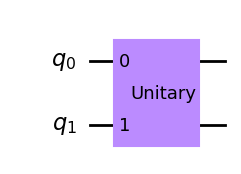

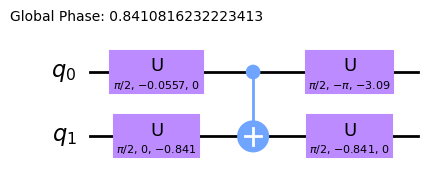

In [5]:
# Any unitary!
matrix = [[0, 0, 0, 1],
          [0, 0, 1, 0],
          [1, 0, 0, 0],
          [0, 1, 0, 0]]

circuit = QuantumCircuit(2)
circuit.unitary(matrix, [0, 1])
display(circuit.draw())
circuit.decompose().draw() #synthesis

In [10]:
from qiskit import Aer 
# Lo ejecutamos en el simulador
simulator = Aer.get_backend('aer_simulator')

#save_unitary debe de ejecutarse despues de haber importado el simulador, si no el circuito no podra utilizar este metodo
# en lugar de medir los resulatados de los qubits del circuito vamos a estimar la matriz que representan sus operaciones
circuit.save_unitary()

# Obtenemos su matriz
result = simulator.run(circuit).result()
unitary = result.get_unitary(circuit)
print("Circuit unitary:\n", unitary.to_matrix())

Circuit unitary:
 [[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


### Circuitos paramétricos

Revisa la documentacion de la clase [Parameter](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.Parameter), con la que podemos crear circuitos paremetrizados donde los valores de rotacion de las puertas son variables.

Los parámetros pueden asignarse en tiempo de ejecución, lo que permite construir algoritmos de optimizacion en los que los parametros se van variando hasta encontrar la solucion óptima

#### EJERCICIO

Crea un circuito de un qubit que ejecute una puerta $R_x$ que depende de un parámetro $\theta$

Dale diferentes valores de $\frac{\pi}{4}, \frac{\pi}{2}, 0$ al parámetro y ejecutalo en el simulador para ver los resultados que se obtienen

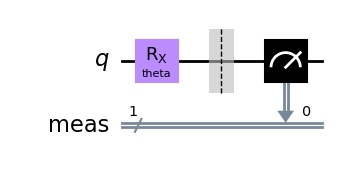

In [11]:
# Circuitos Cuánticos Parametrizados

from qiskit.circuit import Parameter
theta = Parameter('theta')

circuit = QuantumCircuit(1)
circuit.rx(theta, 0)
circuit.measure_all()
circuit.draw()

Los parámetros pueden asignarse en tiempo de ejecución, lo que permite construuir algoritmos de optimizacion en los que los parametros se van variando hasta encontrar la solucion óptima

In [12]:
import numpy as np

theta_values= [np.pi/4,np.pi/2, 0]

simulator = Aer.get_backend('aer_simulator')
res = simulator.run(circuit, parameter_binds=[{theta: theta_values}]).result()  # Different bindings
res.get_counts()

[{'1': 164, '0': 860}, {'1': 511, '0': 513}, {'0': 1024}]

In [28]:
#Podemos ver los parametros de un circuito
circuit.parameters

ParameterView([Parameter(theta)])